In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [122]:
df=pd.read_csv('bigdatamart_train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [123]:
df.shape

(8523, 12)

We have 8523 rows and 12 columns.

In [124]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

We have float type values in item_weight, item_visibiity,item_mrp, item_outlet_sales and int type values are present in outlet_establishment_year. Categorical values are present in item_identifier, item_fat content, item_type, outlet_identifier, outlet_size, outlet_location_type and outlet_type.

# To check missing values

In [125]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Here, there are missing values present in item_weight and outlet_size columns. Lets remove the missing values in further steps.

<AxesSubplot:>

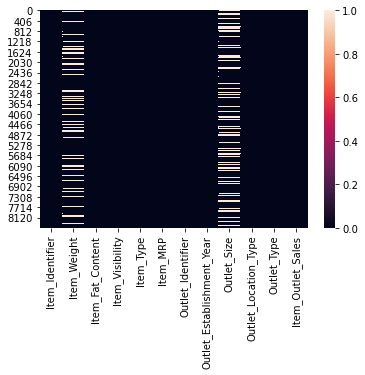

In [126]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

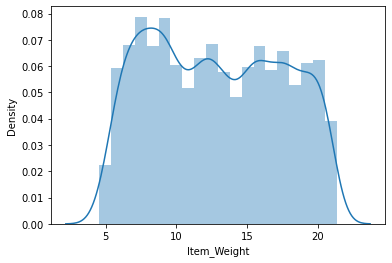

In [127]:
sns.distplot(df['Item_Weight'])

Since, the data is not normally distributed, lets apply median to the missing values present in item_weight column.

Lets apply most frequent i.e. mode to remove the missing values present in outlet_size column.

In [128]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.NaN,strategy='median')
df['Item_Weight']=si.fit_transform(df['Item_Weight'].values.reshape(-1,1))
si=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
df['Outlet_Size']=si.fit_transform(df['Outlet_Size'].values.reshape(-1,1))

In [129]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [130]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Now, all the missing values have been removed.

<AxesSubplot:>

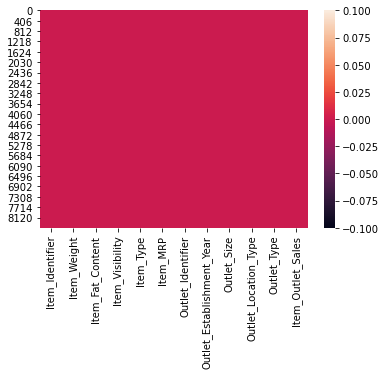

In [131]:
sns.heatmap(df.isnull())

Checking the values present in all the categorical columns.

In [132]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [133]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [134]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [135]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [136]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [137]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

# Summary Statistics

In [138]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


1. The mean is higher than median in item_weight, item_visibility and item_outlet_sales columnns where as median is higher than mean in item_mrp and outlet_establishment_year columns.

2. There is a large difference in the 75th percentile and max in item_mrp and item_outlet_sales columns.  

# To check correlation

In [139]:
dfcorr=df.corr()
dfcorr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.009693
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.009693,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

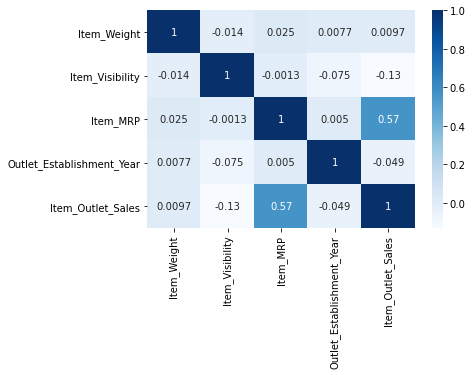

In [140]:
sns.heatmap(dfcorr,cmap='Blues',annot=True)

Item_mrp and item_outlet_sales columns are highly positively correlated. 

# EDA

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

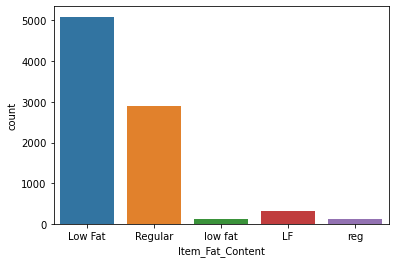

In [141]:
sns.countplot(df['Item_Fat_Content'])

From the above observations, total number of Low Fat content is 5089, Regualar content is 2889, lf is 316, regular is 117 and low fat is 112. 

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

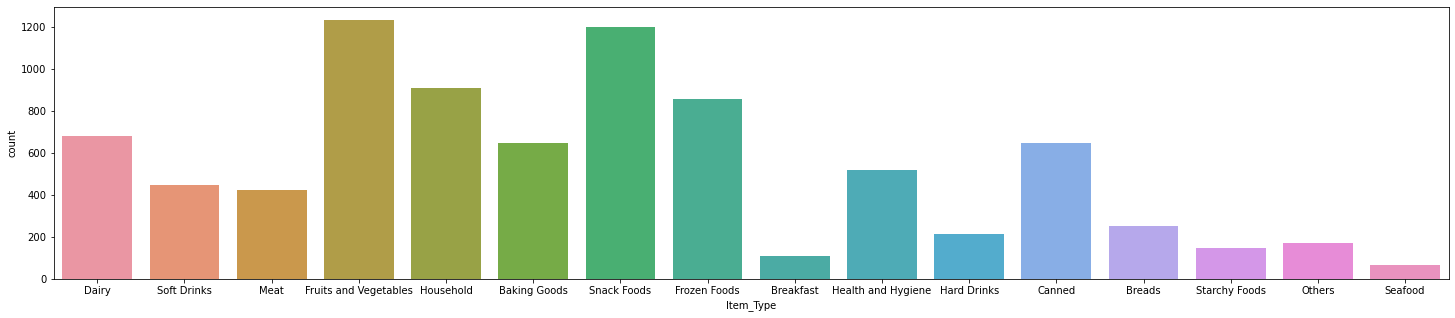

In [142]:
plt.figure(figsize=(25,5))
sns.countplot(df['Item_Type'])

Here, we have a lot of item_types such as dairy, soft drinks, meat and etc.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

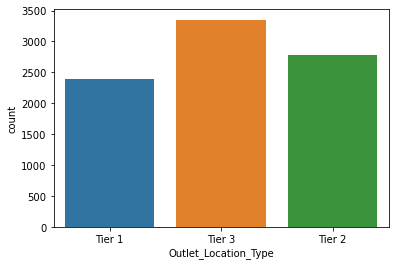

In [143]:
sns.countplot(df['Outlet_Location_Type'])

From the above observations, outlet_location_types of Tier 1 is 2388, Tier 2 is 2785 and Tier 3 is 3350.

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

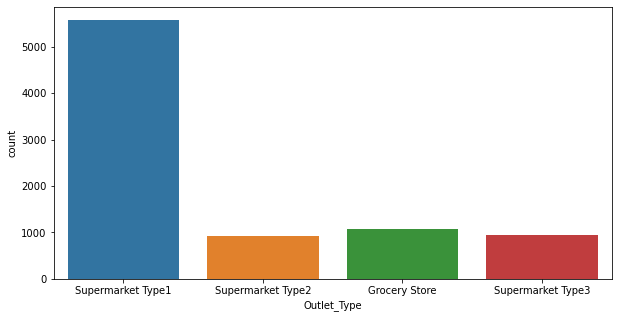

In [144]:
plt.figure(figsize=(10,5))
sns.countplot(df['Outlet_Type'])

From the above observations, Outlet_types of Supermarket Type 1 is 5577, Supermarket Type 2 is 928, Supermarket Type 3 is 935 and Grocery Store is 1083

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

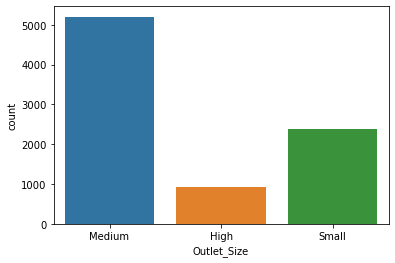

In [145]:
sns.countplot(df['Outlet_Size'])

From the above observations, outlet_sizes of medium is 5203, small is 2388 and high is 932.

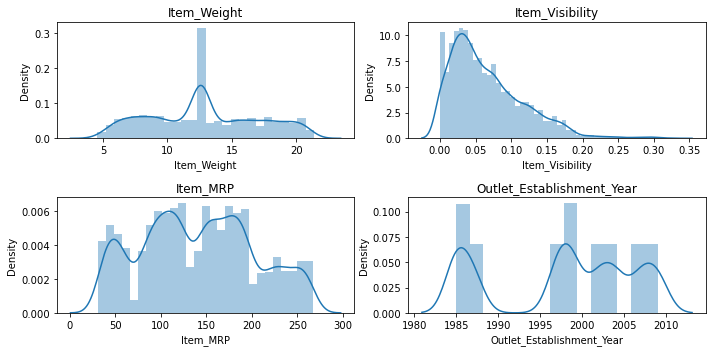

In [146]:
k=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,2,j)
    sns.distplot(df[i])
    plt.title(i)
    j=j+1
plt.tight_layout()    

Datas are normally distributed in all the columns except in item_visibilty column as there is some right skewness present in it.

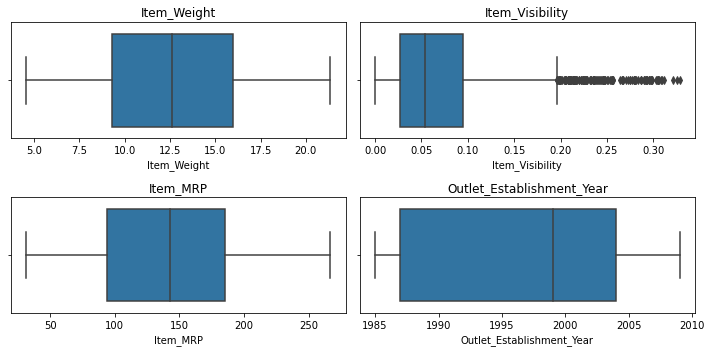

In [147]:
k=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,2,j)
    sns.boxplot(df[i])
    plt.title(i)
    j=j+1
plt.tight_layout()

There are certain outliers present in item_visibilty column.

In [148]:
y=df[['Item_Outlet_Sales']]

In [149]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [150]:
df.drop('Item_Outlet_Sales',axis=1,inplace=True)

In [151]:
df.skew()

Item_Weight                  0.121845
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
dtype: float64

There is some skewness present in item_visibilty column. Lets try to remove the skewness.

In [152]:
df_new=df.copy(deep=True)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

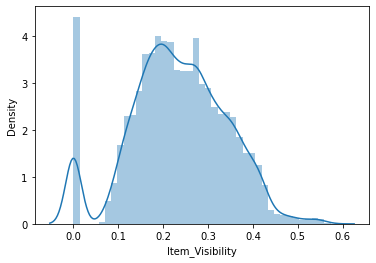

In [153]:
df_new['Item_Visibility']=np.sqrt(df['Item_Visibility'])
sns.distplot(df_new['Item_Visibility'])

In [154]:
df_new.skew()

Item_Weight                  0.121845
Item_Visibility             -0.098056
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
dtype: float64

After applying sqrt technique, the right skewness has been removed in item_visibility_column. So, here there is no skewness present in any of the columns.

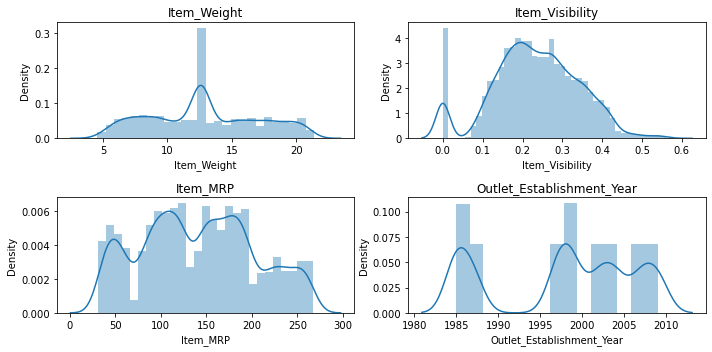

In [155]:
k=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,2,j)
    sns.distplot(df_new[i])
    plt.title(i)
    j=j+1
plt.tight_layout()  

Dats are normally distributed in all the columns.

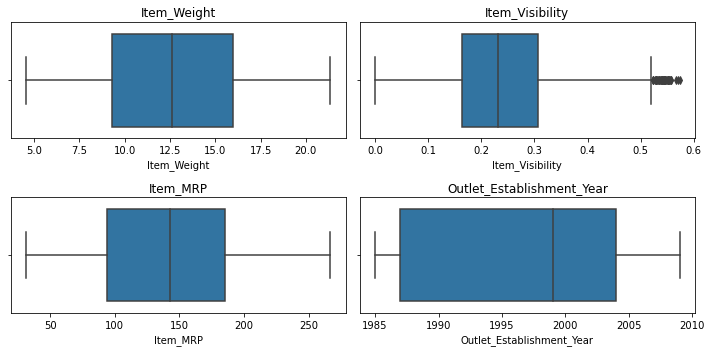

In [156]:
k=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,2,j)
    sns.boxplot(df_new[i])
    plt.title(i)
    j=j+1
plt.tight_layout()  

So ,still there are some outliers present in only item_visibilty column.

In [157]:
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.300,Low Fat,0.126678,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.920,Regular,0.138846,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.500,Low Fat,0.129461,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.238293,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1
8519,FDS36,8.380,Regular,0.216754,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1
8520,NCJ29,10.600,Low Fat,0.187580,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1
8521,FDN46,7.210,Regular,0.381078,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [158]:
df_new['Item_Outlet_Sales']=y['Item_Outlet_Sales']

In [159]:
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.126678,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.138846,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.129461,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.238293,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.216754,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.187580,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.381078,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [160]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new['Item_Identifier']=le.fit_transform(df_new['Item_Identifier'])
df_new['Item_Fat_Content']=le.fit_transform(df_new['Item_Fat_Content'])
df_new['Item_Type']=le.fit_transform(df_new['Item_Type'])
df_new['Outlet_Identifier']=le.fit_transform(df_new['Outlet_Identifier'])
df_new['Outlet_Size']=le.fit_transform(df_new['Outlet_Size'])
df_new['Outlet_Location_Type']=le.fit_transform(df_new['Outlet_Location_Type'])
df_new['Outlet_Type']=le.fit_transform(df_new['Outlet_Type'])

In [161]:
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.126678,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.138846,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.129461,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.238293,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.216754,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.187580,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.381078,13,103.1332,3,2009,1,2,2,1845.5976


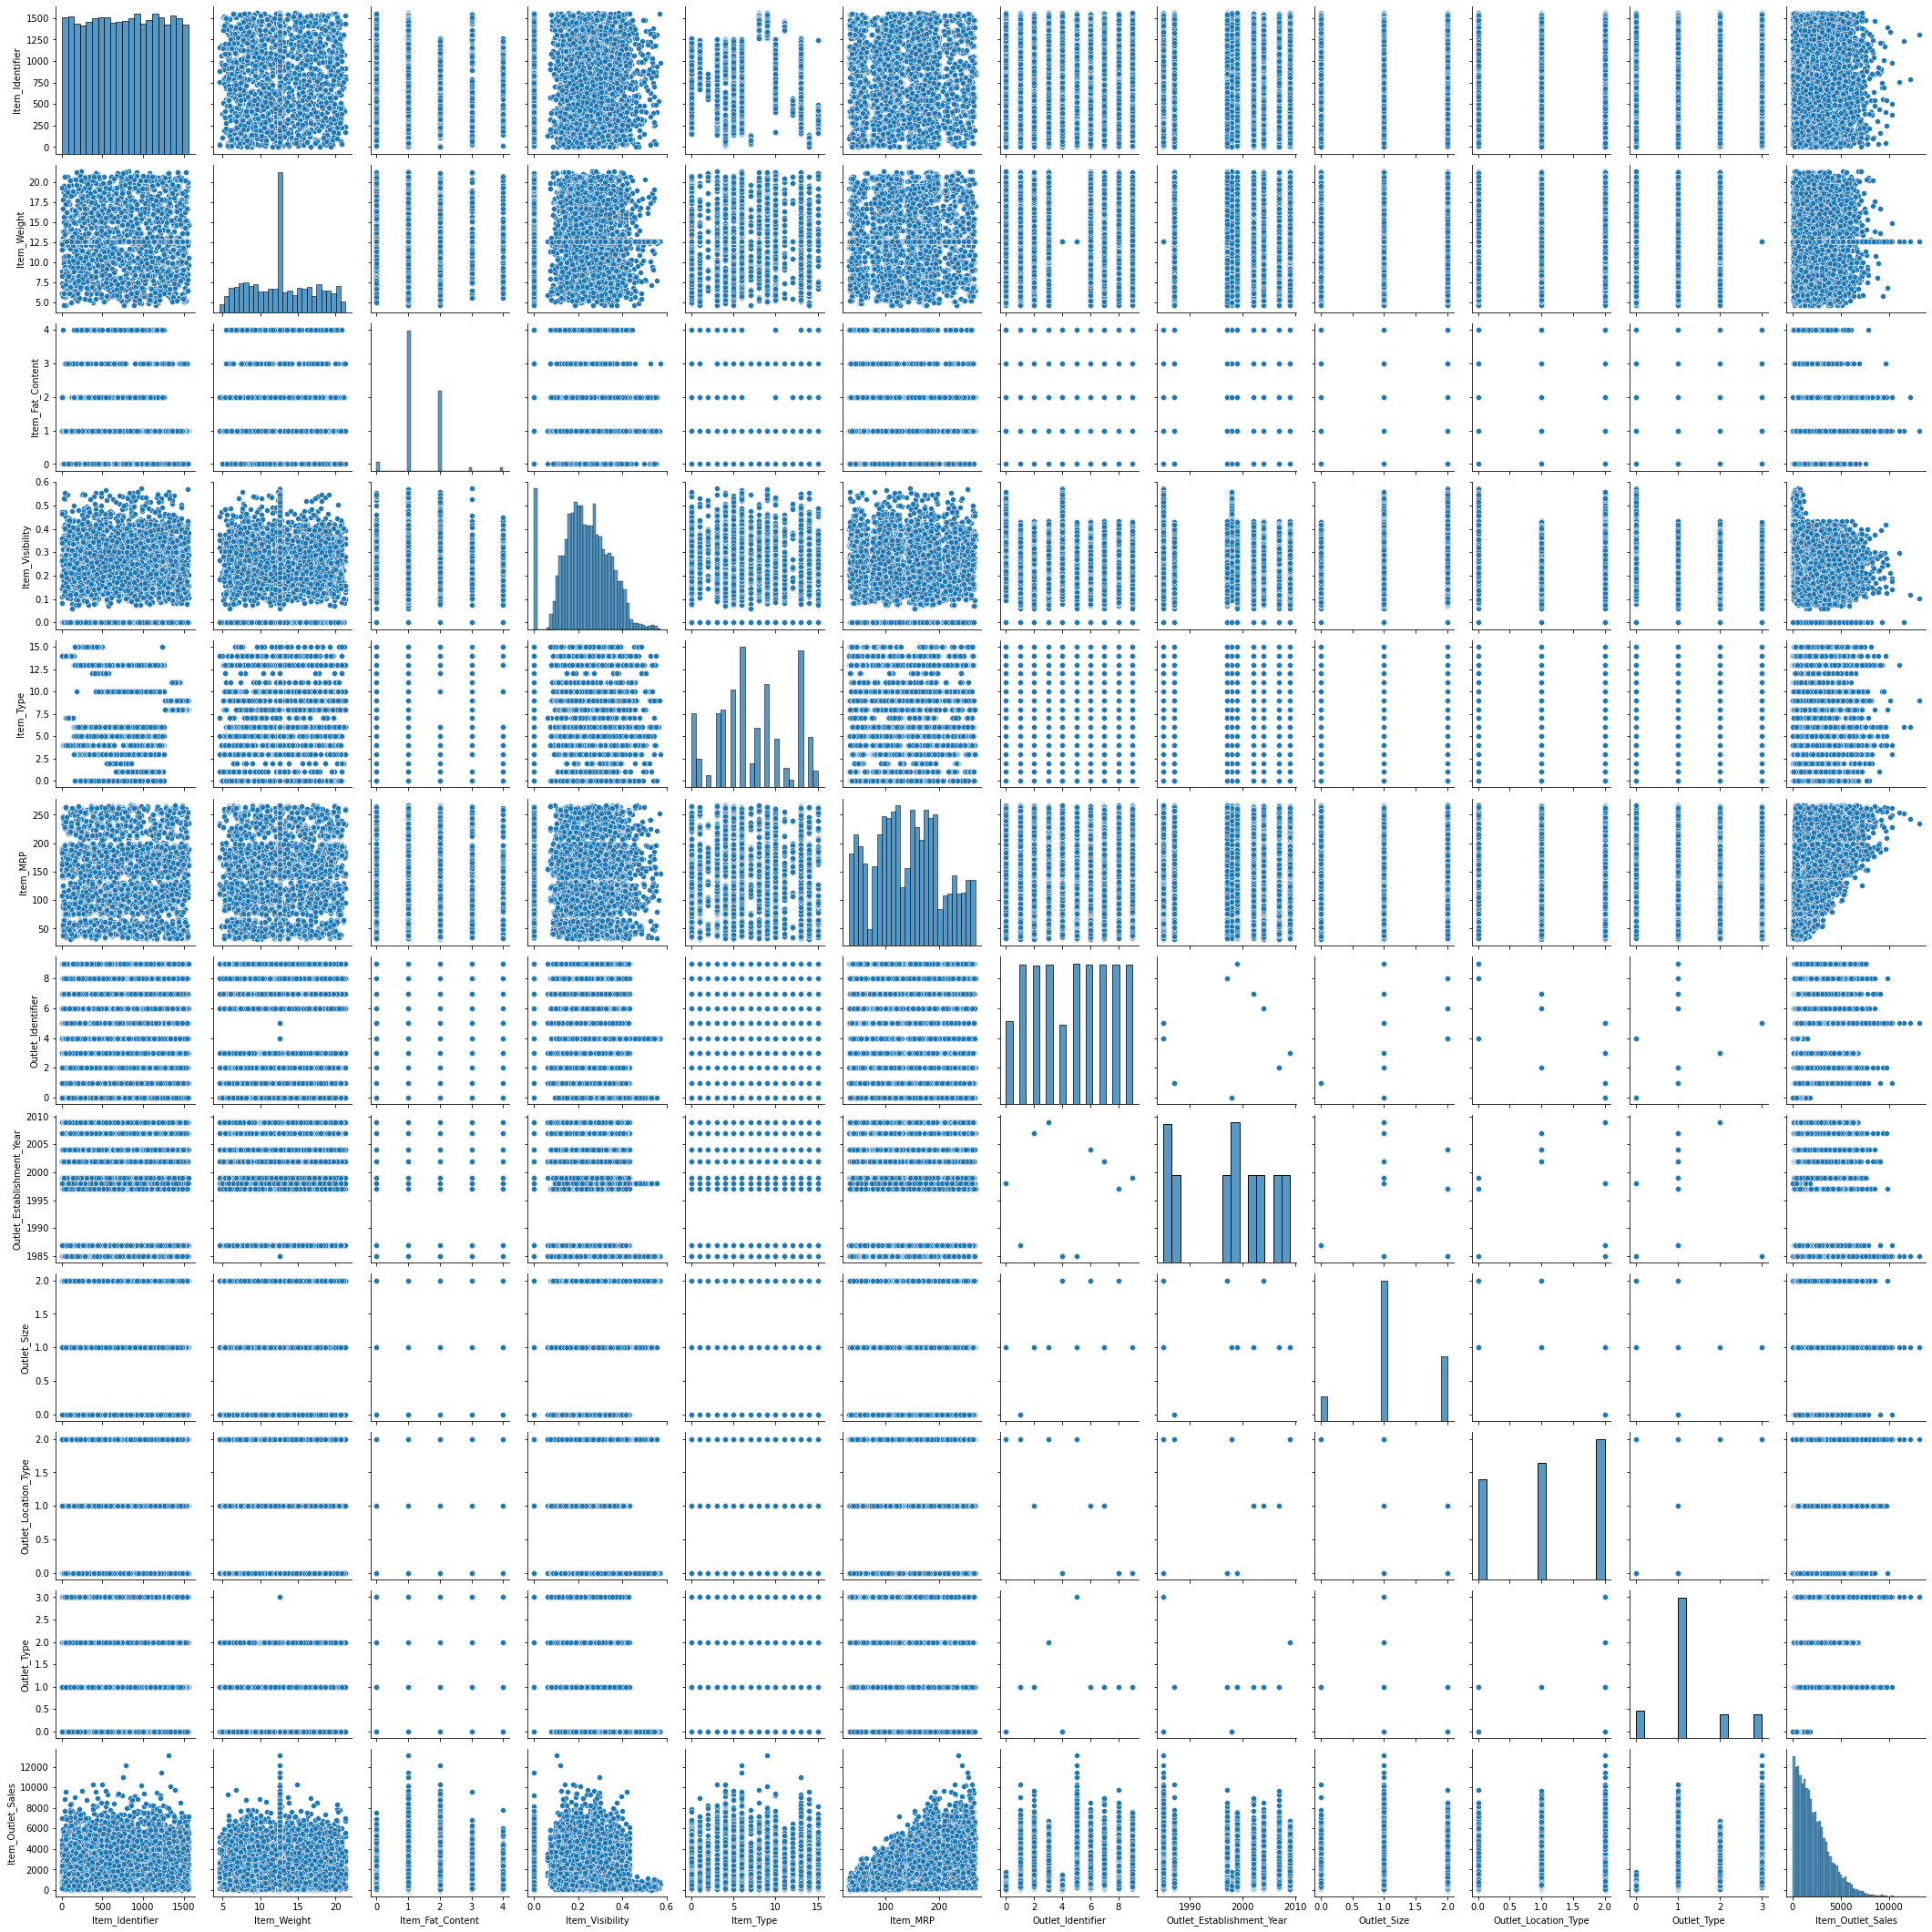

In [162]:
sns.pairplot(df_new)

In [163]:
df1=df_new
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.126678,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.138846,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.129461,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.238293,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.216754,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.187580,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.381078,13,103.1332,3,2009,1,2,2,1845.5976


In [164]:
from scipy.stats import zscore
Threshold=3
z=np.abs(zscore(df1))
z

array([[1.38851383, 0.83118663, 0.57284357, ..., 1.36933384, 0.25265831,
        0.910601  ],
       [1.71799137, 1.63080955, 0.97809218, ..., 1.09156913, 1.00297245,
        1.01844035],
       [0.26205684, 1.10872696, 0.57284357, ..., 1.36933384, 0.25265831,
        0.04923754],
       ...,
       [1.28515188, 0.52363935, 0.57284357, ..., 0.13888236, 0.25265831,
        0.57909963],
       [0.21975905, 1.32562802, 0.97809218, ..., 1.09156913, 1.00297245,
        0.19672492],
       [1.62449099, 0.46997492, 0.57284357, ..., 1.36933384, 0.25265831,
        0.82959407]])

In [165]:
print(np.where(z>3))

(array([  81,  130,  145,  151,  199,  276,  304,  333,  339,  373,  396,
        456,  472,  489,  615,  661,  694,  727,  753,  753,  809,  838,
        854,  891,  935,  991,  997, 1009, 1010, 1034, 1090, 1124, 1133,
       1138, 1183, 1209, 1254, 1372, 1433, 1450, 1506, 1512, 1542, 1549,
       1576, 1615, 1617, 1684, 1723, 1753, 1769, 1805, 1859, 1998, 2062,
       2109, 2111, 2143, 2168, 2173, 2216, 2223, 2238, 2293, 2331, 2438,
       2516, 2535, 2552, 2569, 2660, 2678, 2776, 2855, 2905, 2971, 2973,
       3011, 3083, 3087, 3098, 3154, 3225, 3234, 3241, 3242, 3243, 3286,
       3335, 3367, 3407, 3480, 3491, 3509, 3545, 3582, 3602, 3667, 3709,
       3720, 3750, 3757, 4019, 4083, 4163, 4245, 4289, 4290, 4346, 4349,
       4393, 4415, 4463, 4676, 4680, 4681, 4772, 4865, 4888, 4961, 4991,
       5047, 5054, 5065, 5133, 5146, 5177, 5185, 5202, 5223, 5315, 5401,
       5417, 5467, 5500, 5539, 5550, 5577, 5611, 5619, 5633, 5752, 5784,
       5799, 5812, 5977, 6000, 6132, 6134, 6176, 6

In [166]:
df2=df1[(z<3).all(axis=1)]
df2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.126678,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.138846,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.129461,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.238293,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.216754,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.187580,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.381078,13,103.1332,3,2009,1,2,2,1845.5976


In [167]:
df1.shape

(8523, 12)

In [168]:
df2.shape

(8312, 12)

In [169]:
((8523-8312)/8523)*100

2.4756541124017364

In [170]:
8523-8312

211

Here, 211 rows have been removed since the outliers were present in it.

In [171]:
x=df2.iloc[:,0:-1]
y=df2.iloc[:,-1]

In [172]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,1,0.126678,4,249.8092,9,1999,1,0,1
1,8,5.920,2,0.138846,14,48.2692,3,2009,1,2,2
2,662,17.500,1,0.129461,10,141.6180,9,1999,1,0,1
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.238293,13,214.5218,1,1987,0,2,1
8519,897,8.380,2,0.216754,0,108.1570,7,2002,1,1,1
8520,1357,10.600,1,0.187580,8,85.1224,6,2004,2,1,1
8521,681,7.210,2,0.381078,13,103.1332,3,2009,1,2,2


In [173]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8312, dtype: float64

In [174]:
x.shape

(8312, 11)

In [175]:
y.shape

(8312,)

In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [177]:
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=i)
    lm=DecisionTreeRegressor()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    score=lm.score(x_train,y_train)
    if score>maxAcc:
        maxAcc=score
        maxRS=i
print('Best score is',maxAcc,'on random state',maxRS)          

Best score is 1.0 on random state 1


In [178]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=1)

In [179]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [180]:
lm.score(x_train,y_train)

0.49890252000383206

In [181]:
pred=lm.predict(x_test)
print('Predicted sales',pred)
print('Actual sales',y_test)

Predicted sales [1076.04434139 2177.57465039  857.6908334  ... 3420.40646195 3087.45102659
 1922.4584065 ]
Actual sales 4536     652.4840
318     3877.6192
2900    1997.4000
4302    3338.9870
8480     459.4020
          ...    
1667    5608.6992
776      857.5504
6051    5779.1440
7075    5313.0840
534     2684.5056
Name: Item_Outlet_Sales, Length: 2910, dtype: float64


In [182]:
import numpy as np
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))

1258590.310617597
862.7035846746338
Root Mean squared error: 1121.8691147444952


In [183]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.5063010824833246

In [184]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

1.0

In [185]:
pred=dtr.predict(x_test)
print('Predicted sales',pred)
print('Actual sales',y_test)

Predicted sales [ 490.6946 1938.8096 1947.465  ... 4402.2696 2432.1674 3745.125 ]
Actual sales 4536     652.4840
318     3877.6192
2900    1997.4000
4302    3338.9870
8480     459.4020
          ...    
1667    5608.6992
776      857.5504
6051    5779.1440
7075    5313.0840
534     2684.5056
Name: Item_Outlet_Sales, Length: 2910, dtype: float64


In [186]:
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))

2139773.346555424
1045.418339450172
Root Mean squared error: 1462.7964132289305


In [187]:
r2_score(y_test,pred)

0.16064522663688408

In [188]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [189]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.4454657862823843

In [190]:
pred=knn.predict(x_test)
print('Predicted sales',pred)
print('Actual sales',y_test)

Predicted sales [ 769.93112 2519.3872  1745.7276  ... 1985.94824 2848.82504 2243.34652]
Actual sales 4536     652.4840
318     3877.6192
2900    1997.4000
4302    3338.9870
8480     459.4020
          ...    
1667    5608.6992
776      857.5504
6051    5779.1440
7075    5313.0840
534     2684.5056
Name: Item_Outlet_Sales, Length: 2910, dtype: float64


In [191]:
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))

2032759.2888050762
1067.6075544329897
Root Mean squared error: 1425.7486765924336


In [192]:
r2_score(y_test,pred)

0.20262292503858914

In [193]:
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

0.4688499281107731

In [194]:
pred=svr.predict(x_test)
print('Predicted sales',pred)
print('Actual sales',y_test)

Predicted sales [ 940.59878283 2216.77947388 1039.14397903 ... 2980.22554635 2855.76504231
 1756.87053468]
Actual sales 4536     652.4840
318     3877.6192
2900    1997.4000
4302    3338.9870
8480     459.4020
          ...    
1667    5608.6992
776      857.5504
6051    5779.1440
7075    5313.0840
534     2684.5056
Name: Item_Outlet_Sales, Length: 2910, dtype: float64


In [195]:
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))

1345546.8687137465
878.4044230346185
Root Mean squared error: 1159.9770983574401


In [196]:
r2_score(y_test,pred)

0.47219120714034757

In [197]:
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9367165086590815

In [198]:
pred=rf.predict(x_test)
print('Predicted sales',pred)
print('Actual sales',y_test)

Predicted sales [ 734.983278 2316.125118 1514.714974 ... 3790.419374 2563.303368
 2391.600206]
Actual sales 4536     652.4840
318     3877.6192
2900    1997.4000
4302    3338.9870
8480     459.4020
          ...    
1667    5608.6992
776      857.5504
6051    5779.1440
7075    5313.0840
534     2684.5056
Name: Item_Outlet_Sales, Length: 2910, dtype: float64


In [199]:
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))

1147671.5808060556
765.7144392900345
Root Mean squared error: 1071.294348349722


In [200]:
r2_score(y_test,pred)

0.5498104408331528

These scores can be because of overfitting. Lets check with cross validation.

# Cross Validation

In [201]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lm,x,y,cv=5)
print(score)
print(score.mean())

[0.51568684 0.50095267 0.48178003 0.50195565 0.49806909]
0.4996888569111092


In [202]:
score=cross_val_score(dtr,x,y,cv=5)
print(score)
print(score.mean())

[0.15962854 0.13322704 0.03270949 0.16431053 0.16291402]
0.130557923687651


In [203]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())

[0.19950273 0.18034238 0.16923966 0.18475092 0.17548889]
0.1818649155891062


In [204]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())

[0.55322744 0.53126751 0.52740527 0.55498096 0.55451278]
0.5442787914553836


In [205]:
score=cross_val_score(svr,x,y,cv=5)
print(score)
print(score.mean())

[0.48436007 0.47661027 0.4637521  0.47953076 0.47581239]
0.4760131165040731


Random forest model is working better after checking with the cross validation.

# Hyper Parameter Tuning

In [207]:
from sklearn.model_selection import GridSearchCV

In [211]:
parameters={'n_estimators':[90,100],
            'criterion':['mse','mae'],
             'max_depth':range(2,10,2),
            'max_features':['auto','sqrt','log2']}

In [212]:
gs=GridSearchCV(RandomForestRegressor(),parameters,cv=3)
gs.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': range(2, 10, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [90, 100]})

In [213]:
print(gs.best_params_)

{'criterion': 'mse', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 100}


In [214]:
rfmodel=RandomForestRegressor(criterion='mse',max_depth=6,max_features='auto',n_estimators=100)
rfmodel.fit(x_train,y_train)
score=rfmodel.score(x_train,y_train)
print(score)

0.6160608737076461


# Saving the model

In [215]:
import joblib
joblib.dump(rfmodel,'rfmodel.obj')

['rfmodel.obj']

# Test Data

In [216]:
df3=pd.read_csv('Bigdatamart_test.csv')
df3

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [217]:
df3.shape

(5681, 11)

We have 5681 rows and 11 columns.

In [218]:
df3.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

We have float type values in item_weight, item_visibiity,item_mrp and int type values are present in outlet_establishment_year. Categorical values are present in item_identifier, item_fat content, item_type, outlet_identifier, outlet_size, outlet_location_type and outlet_type.

# To check missing values

In [219]:
df3.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Here, there are missing values present in item_weight and outlet_size columns. Lets remove the missing values in further steps.

<AxesSubplot:>

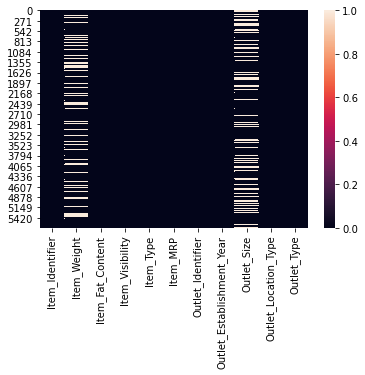

In [220]:
sns.heatmap(df3.isnull())

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

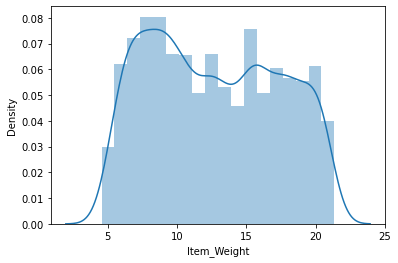

In [221]:
sns.distplot(df3['Item_Weight'])

Since, the data is not normally distributed, lets apply median to the missing values present in item_weight column.

Lets apply most frequent i.e. mode to remove the missing values present in outlet_size column.

In [222]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.NaN,strategy='median')
df3['Item_Weight']=si.fit_transform(df3['Item_Weight'].values.reshape(-1,1))
si=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
df3['Outlet_Size']=si.fit_transform(df3['Outlet_Size'].values.reshape(-1,1))

In [223]:
df3

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [224]:
df3.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Now, all the missing values have been removed.

<AxesSubplot:>

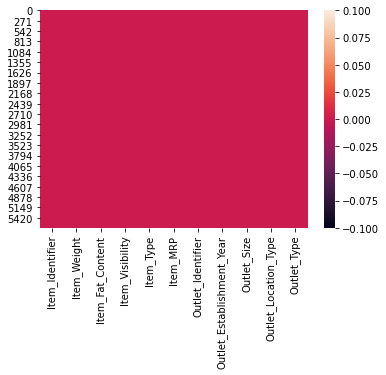

In [225]:
sns.heatmap(df3.isnull())

# Summary Statistics

In [226]:
df3.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.662023,0.065684,141.023273,1997.828903
std,4.245831,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


1. The mean is higher than median in item_weight and item_visibility where as median is higher than mean in item_mrp and outlet_establishment_year columns.

# To check correlation

In [227]:
df3corr=df3.corr()
df3corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.018342,0.045048,0.025678
Item_Visibility,-0.018342,1.000000,-0.014013,-0.097040
Item_MRP,0.045048,-0.014013,1.000000,-0.007233
Outlet_Establishment_Year,0.025678,-0.097040,-0.007233,1.000000


<AxesSubplot:>

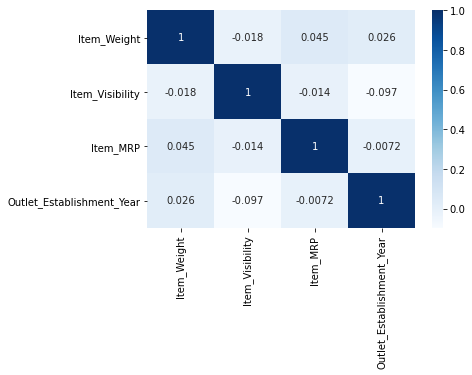

In [228]:
sns.heatmap(df3corr,cmap='Blues',annot=True)

Item_visibility and outlet_establishment_year are negatively correlated.

# EDA

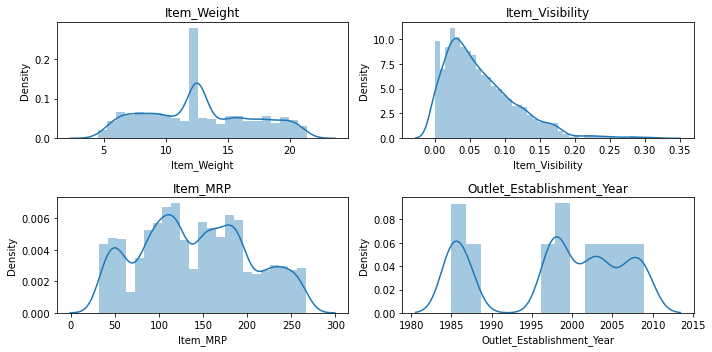

In [229]:
k=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,2,j)
    sns.distplot(df3[i])
    plt.title(i)
    j=j+1
plt.tight_layout()    

Datas are normally distributed in all the columns except in item_visibilty column as there is some right skewness present in it.

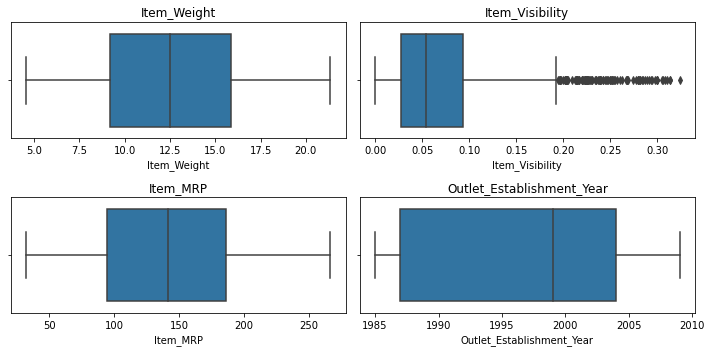

In [230]:
k=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,2,j)
    sns.boxplot(df3[i])
    plt.title(i)
    j=j+1
plt.tight_layout()    

There are some outliers present in item_visibilty column.

In [231]:
df3.skew()

Item_Weight                  0.166489
Item_Visibility              1.238312
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
dtype: float64

There is some skewness present in item_visibilty column. Lets try to remove the skewness.

In [232]:
df_new1=df3.copy(deep=True)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

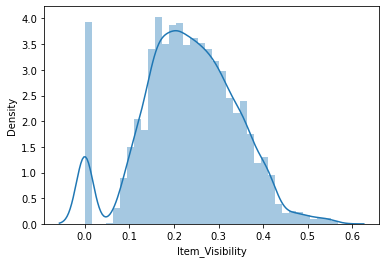

In [233]:
df_new1['Item_Visibility']=np.sqrt(df3['Item_Visibility'])
sns.distplot(df_new1['Item_Visibility'])

In [234]:
df_new1.skew()

Item_Weight                  0.166489
Item_Visibility             -0.094941
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
dtype: float64

After applying sqrt technique, the right skewness has been removed in item_visibility_column. So, here there is no skewness present in any of the columns.

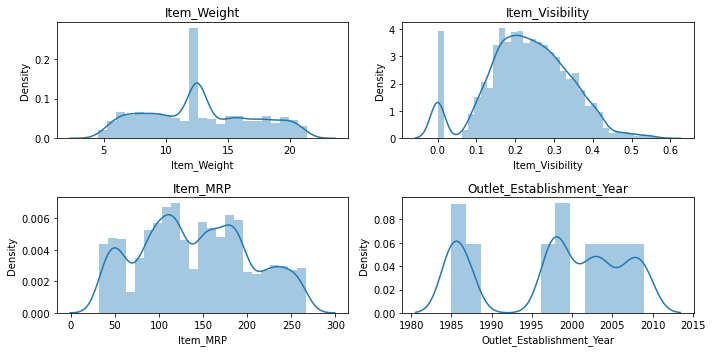

In [235]:
k=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,2,j)
    sns.distplot(df_new1[i])
    plt.title(i)
    j=j+1
plt.tight_layout()   

Datas are normally distributed in all the columns after removing the skewness.

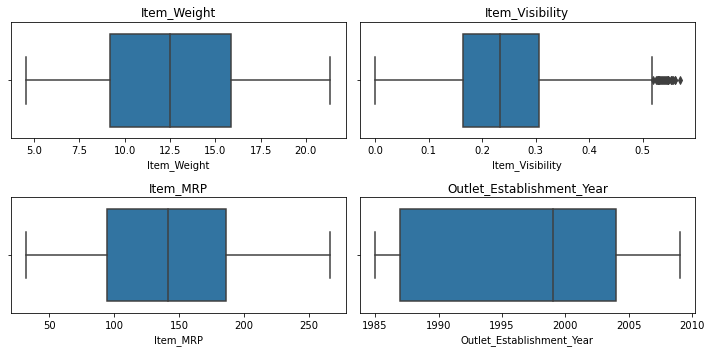

In [236]:
k=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,2,j)
    sns.boxplot(df_new1[i])
    plt.title(i)
    j=j+1
plt.tight_layout()   

So ,still there are some outliers present in only item_visibilty column.

In [237]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new1['Item_Identifier']=le.fit_transform(df_new1['Item_Identifier'])
df_new1['Item_Fat_Content']=le.fit_transform(df_new1['Item_Fat_Content'])
df_new1['Item_Type']=le.fit_transform(df_new1['Item_Type'])
df_new1['Outlet_Identifier']=le.fit_transform(df_new1['Outlet_Identifier'])
df_new1['Outlet_Size']=le.fit_transform(df_new1['Outlet_Size'])
df_new1['Outlet_Location_Type']=le.fit_transform(df_new1['Outlet_Location_Type'])
df_new1['Outlet_Type']=le.fit_transform(df_new1['Outlet_Type'])

In [238]:
df_new1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,1,0.086976,13,107.8622,9,1999,1,0,1
1,1067,8.300,4,0.196030,4,87.3198,2,2007,1,1,1
2,1406,14.600,1,0.315555,11,241.7538,0,1998,1,2,0
3,809,7.315,1,0.124050,13,155.0340,2,2007,1,1,1
4,1184,12.500,2,0.344383,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500,2,0.116174,13,141.3154,8,1997,2,0,1
5677,306,7.600,2,0.378141,15,169.1448,3,2009,1,2,2
5678,1412,10.000,1,0.271162,8,118.7440,7,2002,1,1,1
5679,517,15.300,2,0.000000,3,214.6218,2,2007,1,1,1


In [239]:
from scipy.stats import zscore
Threshold=3
z=np.abs(zscore(df_new1))
z

array([[0.73989552, 1.90508981, 0.57528374, ..., 0.28473712, 1.369215  ,
        0.25276858],
       [0.65908503, 1.02745678, 4.10469757, ..., 0.28473712, 0.1388274 ,
        0.25276858],
       [1.42005049, 0.45648246, 0.57528374, ..., 0.28473712, 1.0915602 ,
        1.50799439],
       ...,
       [1.43351891, 0.62702873, 0.57528374, ..., 0.28473712, 0.1388274 ,
        0.25276858],
       [0.57551969, 0.6213646 , 0.98471003, ..., 0.28473712, 0.1388274 ,
        0.25276858],
       [0.47950616, 0.74480168, 0.98471003, ..., 0.28473712, 0.1388274 ,
        0.25276858]])

In [240]:
print(np.where(z>3))

(array([   1,  103,  242,  369,  499,  595,  739,  783,  797,  815,  858,
        985,  996, 1025, 1037, 1105, 1143, 1256, 1256, 1284, 1314, 1321,
       1422, 1437, 1539, 1757, 1780, 1853, 1927, 2070, 2167, 2271, 2275,
       2365, 2595, 2609, 2798, 2843, 2866, 2915, 2926, 3039, 3077, 3097,
       3316, 3357, 3362, 3461, 3565, 3622, 3744, 3778, 3783, 3950, 4021,
       4133, 4146, 4148, 4208, 4232, 4330, 4334, 4340, 4352, 4478, 4542,
       4616, 4692, 4726, 4845, 4870, 4921, 4941, 4965, 4970, 5132, 5154,
       5168, 5323, 5328, 5429, 5447, 5542, 5671], dtype=int64), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64))


In [241]:
df4=df_new1[(z<3).all(axis=1)]
df4

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,1,0.086976,13,107.8622,9,1999,1,0,1
2,1406,14.600,1,0.315555,11,241.7538,0,1998,1,2,0
3,809,7.315,1,0.124050,13,155.0340,2,2007,1,1,1
4,1184,12.500,2,0.344383,4,234.2300,5,1985,1,2,3
5,461,9.800,2,0.252621,6,117.1492,8,1997,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500,2,0.116174,13,141.3154,8,1997,2,0,1
5677,306,7.600,2,0.378141,15,169.1448,3,2009,1,2,2
5678,1412,10.000,1,0.271162,8,118.7440,7,2002,1,1,1
5679,517,15.300,2,0.000000,3,214.6218,2,2007,1,1,1


In [242]:
df_new1.shape

(5681, 11)

In [243]:
df4.shape

(5598, 11)

In [244]:
((5681-5598)/5681)*100

1.4610103854955112

So, 83 rows have been removed since there were outliers present in it.

In [250]:
rffile=joblib.load('rfmodel.obj')
rffile.predict(x_test)

array([ 679.46661842, 2431.19752234, 1316.76698374, ..., 3983.00191475,
       3064.14327796, 2424.51712414])